<a href="https://colab.research.google.com/github/MagnusRedkin/Netology/blob/main/%D0%94%D0%97%C2%AB%D0%94%D0%B5%D1%80%D0%B5%D0%B2%D1%8C%D1%8F_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D0%B9%C2%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing

In [ ]:
data, target = fetch_california_housing(return_X_y=True, as_frame=True)
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [ ]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: MedHouseVal
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


Пропусков нет.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
model.score(X_test, y_test)

0.5757877060324511

**Смотрим что с деревом. Исследуем глубину.**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
list = [1,2,3,4,5,7,8,9,10,11,12,13]

In [ ]:
model_opt = {}
for i in list:
    model_opt[f'dep={i}'] = DecisionTreeRegressor(max_depth=i, random_state=10).fit(X_train, y_train)

In [ ]:
pred_list = {}
for key, model_opt_reg in model_opt.items():
      pred_list[key] = model_opt_reg.predict(X_test)
      print(key, model_opt_reg.score(X_train, y_train), model_opt_reg.score(X_test, y_test))

dep=1 0.3169966266359021 0.27951121634638154
dep=2 0.4520447281677594 0.4244060273337802
dep=3 0.5378979887726012 0.5097629887358217
dep=4 0.5886585082002127 0.5540288505085005
dep=5 0.6376786573648903 0.5997321244428706
dep=7 0.716697558789222 0.6515700686011479
dep=8 0.7601733883178261 0.6773955958507856
dep=9 0.7999255297501255 0.6877803370055027
dep=10 0.8347775350789697 0.680075646835046
dep=11 0.8705750262898396 0.6739330387902008
dep=12 0.8991184805982447 0.6724566023522628
dep=13 0.9235925299024792 0.6612506775614237


**После глубины 10 показатели начинают переобучаться. Визуализируем часть дерева решений, где график получился читабельным.**

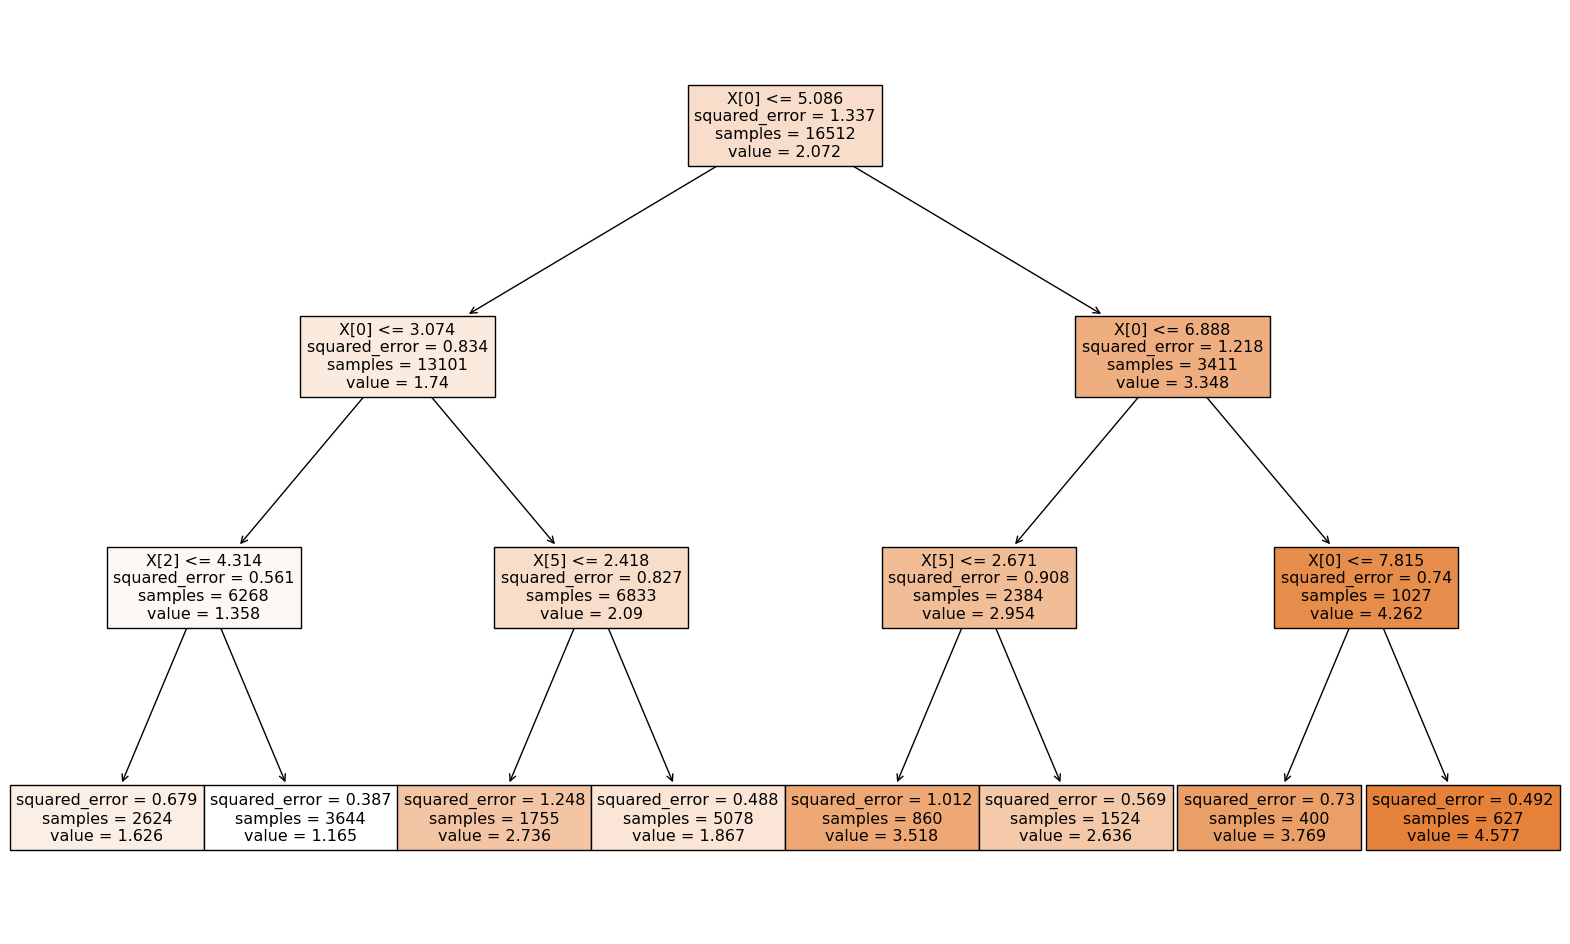

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 12))
plot_tree(model_opt['dep=3'], filled=True);

**Проверим на количество сэмплов в листе.**

In [ ]:
model_opt = {}
for i in list:
    model_opt[f'reg={i}'] = DecisionTreeRegressor(min_samples_leaf=i, random_state=10).fit(X_train, y_train)

In [ ]:
pred_list = {}
for key, model_opt_reg in model_opt.items():
      pred_list[key] = model_opt_reg.predict(X_test)
      print(key, model_opt_reg.score(X_train, y_train), model_opt_reg.score(X_test, y_test))

reg=1 1.0 0.6167743898170341
reg=2 0.976245723449928 0.664324688698939
reg=3 0.9497743747036499 0.6684778510339962
reg=4 0.9273097538929191 0.6829114401674272
reg=5 0.9108329972560135 0.6961803337832526
reg=7 0.8840476246434247 0.7132165012663177
reg=8 0.8712611366028836 0.7188947113142667
reg=9 0.862364886115569 0.7229464397974015
reg=10 0.855444223174361 0.7232220225251802
reg=11 0.8500790413546615 0.7276836031121167
reg=12 0.8431142871911331 0.7254646765898763
reg=13 0.8373793345065117 0.7257683679894631


**Здесь максимум теста 11 сэмплов.**

In [ ]:
model_opt = DecisionTreeRegressor(min_samples_leaf=11, random_state=10).fit(X_train, y_train)

In [ ]:
model_opt.predict(X_test)
model_opt.score(X_test, y_test)

0.7276836031121167

**Результат дерева лучше линейной регрессии.**\
P.S. Визуализация оптимизированной модели.

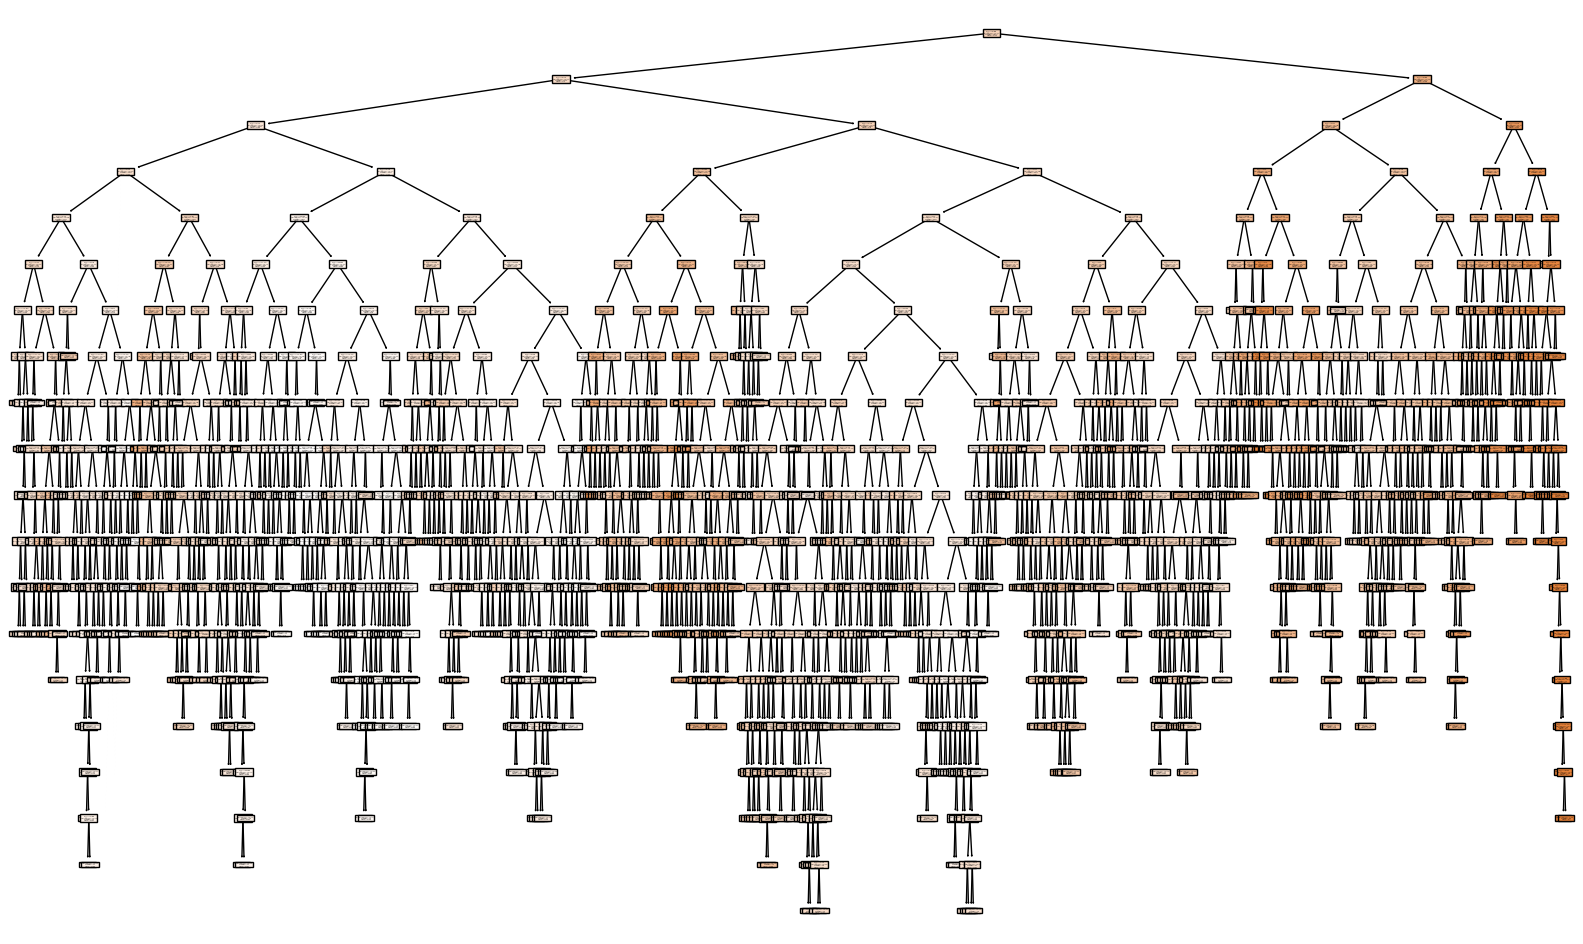

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 12))
plot_tree(model_opt, filled=True);

**Понятно но не читабельно.**

In [ ]:
from sklearn import tree
text_representation = tree.export_text(model_opt)
print(text_representation)

|--- feature_0 <= 5.09
|   |--- feature_0 <= 3.07
|   |   |--- feature_2 <= 4.31
|   |   |   |--- feature_0 <= 2.21
|   |   |   |   |--- feature_2 <= 3.42
|   |   |   |   |   |--- feature_3 <= 1.03
|   |   |   |   |   |   |--- feature_7 <= -121.83
|   |   |   |   |   |   |   |--- feature_2 <= 3.04
|   |   |   |   |   |   |   |   |--- value: [2.08]
|   |   |   |   |   |   |   |--- feature_2 >  3.04
|   |   |   |   |   |   |   |   |--- value: [1.36]
|   |   |   |   |   |   |--- feature_7 >  -121.83
|   |   |   |   |   |   |   |--- feature_6 <= 35.34
|   |   |   |   |   |   |   |   |--- feature_7 <= -118.30
|   |   |   |   |   |   |   |   |   |--- value: [2.01]
|   |   |   |   |   |   |   |   |--- feature_7 >  -118.30
|   |   |   |   |   |   |   |   |   |--- feature_7 <= -117.33
|   |   |   |   |   |   |   |   |   |   |--- feature_5 <= 4.01
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_5 >  4.01
|   |   | 

**Читабельно, но непонятно  :)**